# Forest Cover Type Prediciton
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

## 1) Problem statement.

* Predicting forest cover type from cartographic variables only (no remotely sensed data). The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types).
* This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices
* these four wilderness areas: Neota (area 2) probably has the highest mean elevational value of the 4 wilderness areas. Rawah (area 1) and Comanche Peak (area 3) would have a lower mean elevational value, while Cache la Poudre (area 4) would have the lowest mean elevational value.

## 2) Data Collection.
* The Dataset is collected from UCI Repository -  https://archive.ics.uci.edu/ml/datasets/covertype
* The data consists of 54 columns and 581012 rows.

### 2.1 Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets

# metadata
print(covertype.metadata)

# variable information
print(covertype.variables)


{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

In [4]:
X

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
...           ...     ...    ...                               ...   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    0                              510   
1                                   -6                              390   
2                                   65                             3180   
3                                  118                             3090   
4                                   -1                              391   
...                                ...                              ...   
581007                              17                              108   
581008                              12                               95   
581009                               7                               90   
581010                               5                               90   
581011                               4                               67   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                 221             232            148   
1                 220             235            151   
2                 234             238            135   
3                 238             238            122   
4                 220             234            150   
...               ...             ...            ...   
581007            240             237            118   
581008            240             237            119   
581009            236             241            130   
581010            230             245            143   
581011            231             244            141   

        Horizontal_Distance_To_Fire_Points  ...  Soil_Type34  Soil_Type35  \
0                                     6279  ...            0            0   
1                                     6225  ...            0            0   
2                                     6121  ...            0            0   
3                                     6211  ...            0            0   
4                                     6172  ...            0            0   
...                                    ...  ...          ...          ...   
581007                                 837  ...            0            0   
581008                                 845  ...            0            0   
581009                                 854  ...            0            0   
581010                                 864  ...            0            0   
581011                                 875  ...            0            0   

        Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  \
0                 0            0            0            0            0   
1                 0            0            0            0            0   
2                 0            0            0            0            0   
3                 0            0            0            0            0   
4                 0            0            0            0            0   
...             ...          ...          ...          ...          ...   
581007            0            0            0            0            0   
581008            0            0            0            0          

In [5]:
y

Cover_Type
0                5
1                5
2                2
3                2
4                5
...            ...
581007           3
581008           3
581009           3
581010           3
581011           3

[581012 rows x 1 columns]

**Import the CSV Data as Pandas DataFrame**

In [6]:
df = pd.concat([X, y], axis=1)

In [7]:
df.to_csv("covertype.csv", index = False)

In [8]:
df = pd.read_csv("/content/covertype.csv")

In [9]:
df.shape

(581012, 55)

#### Datatypes of the attributes

In [10]:
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                            int64
Soil_Type10                           int64
Soil_Type11                           int64
Soil_Type12                           int64
Soil_Type13                           int64
Soil_Type14                           int64
Soil_Type15                           int64
Soil_Type16                           int64
Soil_Type17                           int64
Soil_Type18                           int64
Soil_Type19                           int64
Soil_Type20                           int64
Soil_Type21                           int64
Soil_Type22                           int64
Soil_Type23                           int64
Soil_Type24                           int64
Soil_Type25                           int64
Soil_Type26                           int64
Soil_Type27                           int64
Soil_Type28                           int64
Soil_Type29                           int64
Soil_Type30                           int64
Soil_Type31                           int64
Soil_Type32                           int64
Soil_Type33                           int64
Soil_Type34                           int64
Soil_Type35                           int64
Soil_Type36                           int64
Soil_Type37                           int64
Soil_Type38                           int64
Soil_Type39                           int64
Soil_Type40                           int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Cover_Type                            int64
dtype: object

#### Check statistics of data set

In [11]:
pd.set_option('display.max_columns', None) # we need to see all the columns
df.describe()

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count  581012.000000                       581012.000000     581012.000000   
mean      142.528263                         1980.291226          0.448865   
std        38.274529                         1324.195210          0.497379   
min         0.000000                            0.000000          0.000000   
25%       119.000000                         1024.000000          0.000000   
50%       143.000000                         1710.000000          0.000000   
75%       168.000000                         2550.000000          1.000000   
max       254.000000                         7173.000000          1.000000   

          Soil_Type1     Soil_Type2     Soil_Type3     Soil_Type4  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.005217       0.012952       0.008301       0.021335   
std         0.072039       0.113066       0.090731       0.144499   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Soil_Type5     Soil_Type6     Soil_Type7     Soil_Type8  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.002749       0.011316       0.000181       0.000308   
std         0.052356       0.105775       0.013442       0.017550   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Soil_Type9    Soil_Type10    Soil_Type11    Soil_Type12  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.001974       0.056168       0.021359       0.051584   
std         0.044387       0.230245 

In [12]:
df.shape

(581012, 55)

#### Inferences
- Count is 581012 for each column, so no data point is missing.
- Soil type 7,15,8 and 36 are constant(each value is zero), so they can be removed.
- Wilderness_Area and Soil_Type are one hot encoded. Hence, they could be converted back for some analysis.
- Scales are not the same for all. Hence, rescaling and standardisation may be necessary for some algorithms.

#### Remove unnecessary columns

In [13]:
df1 = df.copy()
#Remove unnecessary columns
remove_columns = []

#std = 0 are constant columns, they don't help in prediction process
for col in df1.columns:
    if df1[col].std() <= 0.02: #standard deviation is zero
        remove_columns.append(col)

#drop the columns
df1.drop(remove_columns,axis=1,inplace=True)

print(remove_columns)
#Following columns are dropped

['Soil_Type7', 'Soil_Type8', 'Soil_Type15', 'Soil_Type36']


#### Restoring original values for better analysis.

#### The target variable of our data i.e Cover_Type is one hot encoded.
#### As our data is already preprocessed but we will  replace the foresteric values back to their original values for better analysis and data visualization.

In [14]:
df1['Cover_Type'].replace({1:'Spruce/Fir', 2:'Lodgepole Pine', 3:'Ponderosa Pine', 4:'Cottonwood/Willow', 5:'Aspen', 6:'Douglas-fir', 7:'Krummholz'}, inplace=True)

In [15]:
df1 = df1.rename(columns={"Wilderness_Area1":"Rawah_WA","Wilderness_Area2":"Neota_WA",
"Wilderness_Area3":"Comanche_Peak_WA","Wilderness_Area4":"Cache_la_Poudre_WA","Horizontal_Distance_To_Hydrology":"HD_Hydrology",
"Vertical_Distance_To_Hydrology":"VD_Hydrology","Horizontal_Distance_To_Roadways":"HD_Roadways",
                               "Horizontal_Distance_To_Fire_Points":"HD_Fire_Points"})

In [16]:
df2 = df1.copy()
df2['Wild Areas'] = (df2.iloc[:,10:15] == 1).idxmax(1)
df2['Soil types'] = (df2.iloc[:,15:55] == 1).idxmax(1)
df2['Wild Areas'].unique()

array(['Rawah_WA', 'Soil_Type4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3'],
      dtype=object)

#### Drop the columns which are not required now

In [17]:
df2 = df2.drop(columns=['Rawah_WA', 'Neota_WA', 'Comanche_Peak_WA',
       'Cache_la_Poudre_WA', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'])

In [18]:
df=df2

**Show Top 5 Records**

In [19]:
df.head()

Elevation  Aspect  Slope  HD_Hydrology  VD_Hydrology  HD_Roadways  \
0       2596      51      3           258             0          510   
1       2590      56      2           212            -6          390   
2       2804     139      9           268            65         3180   
3       2785     155     18           242           118         3090   
4       2595      45      2           153            -1          391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  HD_Fire_Points  \
0            221             232            148            6279   
1            220             235            151            6225   
2            234             238            135            6121   
3            238             238            122            6211   
4            220             234            150            6172   

       Cover_Type Wild Areas   Soil types  
0           Aspen   Rawah_WA  Soil_Type29  
1           Aspen   Rawah_WA  Soil_Type29  
2  Lodgepole Pine   Rawah_WA  Soil_Type12  
3  Lodgepole Pine   Rawah_WA  Soil_Type30  
4           Aspen   Rawah_WA  Soil_Type29

**Shape of the dataset**

In [20]:
df.shape

(581012, 13)

**Summary of the dataset**

In [21]:
# Display summary statistics for a dataframe
df.describe()

Elevation         Aspect          Slope   HD_Hydrology  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704     269.428217   
std       279.984734     111.913721       7.488242     212.549356   
min      1859.000000       0.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000     108.000000   
50%      2996.000000     127.000000      13.000000     218.000000   
75%      3163.000000     260.000000      18.000000     384.000000   
max      3858.000000     360.000000      66.000000    1397.000000   

        VD_Hydrology    HD_Roadways  Hillshade_9am  Hillshade_Noon  \
count  581012.000000  581012.000000  581012.000000   581012.000000   
mean       46.418855    2350.146611     212.146049      223.318716   
std        58.295232    1559.254870      26.769889       19.768697   
min      -173.000000       0.000000       0.000000        0.000000   
25%         7.000000    1106.000000     198.000000      213.000000   
50%        30.000000    1997.000000     218.000000      226.000000   
75%        69.000000    3328.000000     231.000000      237.000000   
max       601.000000    7117.000000     254.000000      254.000000   

       Hillshade_3pm  HD_Fire_Points  
count  581012.000000   581012.000000  
mean      142.528263     1980.291226  
std        38.274529     1324.195210  
min         0.000000        0.000000  
25%       119.000000     1024.000000  
50%       143.000000     1710.000000  
75%       168.000000     2550.000000  
max       254.000000     7173.000000

### Feature Information
* **Elevation :** Elevation in meters.
* **Aspect :** Aspect in degrees azimuth.
* **Slope :** Slope in degrees
* **Horizontal_Distance_To_Hydrology :**  Horz Dist to nearest surface water features
* **Vertical_Distance_To_Hydrology :** Vert Dist to nearest surface water features
* **Horizontal_Distance_To_Roadways :**Horz Dist to nearest roadway
* **Hillshade_9am (0 to 255 index):** Hillshade index at 9am, summer solstice.
* **Hillshade_Noon (0 to 255 index):**  Hillshade index at noon, summer solstice.
* **Hillshade_3pm (0 to 255 index) :**  Hillshade index at 3pm, summer solstice
* **Horizontal_Distance_To_Fire_Point :** Horz Dist to nearest wildfire ignition points
* **Wilderness_Area (4 binary columns, 0 = absence or 1 = presence)  :**Wilderness area designation
* **Soil_Type (40 binary columns, 0 = absence or 1 = presence):** Soil Type designation
* **Cover_Type (7 types, integers 1 to 7) :**  Forest Cover Type designation (target).

## 3. EXPLORING DATA

In [22]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hydrology', 'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'HD_Fire_Points']

We have 3 categorical features : ['Cover_Type', 'Wild Areas', 'Soil types']


## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

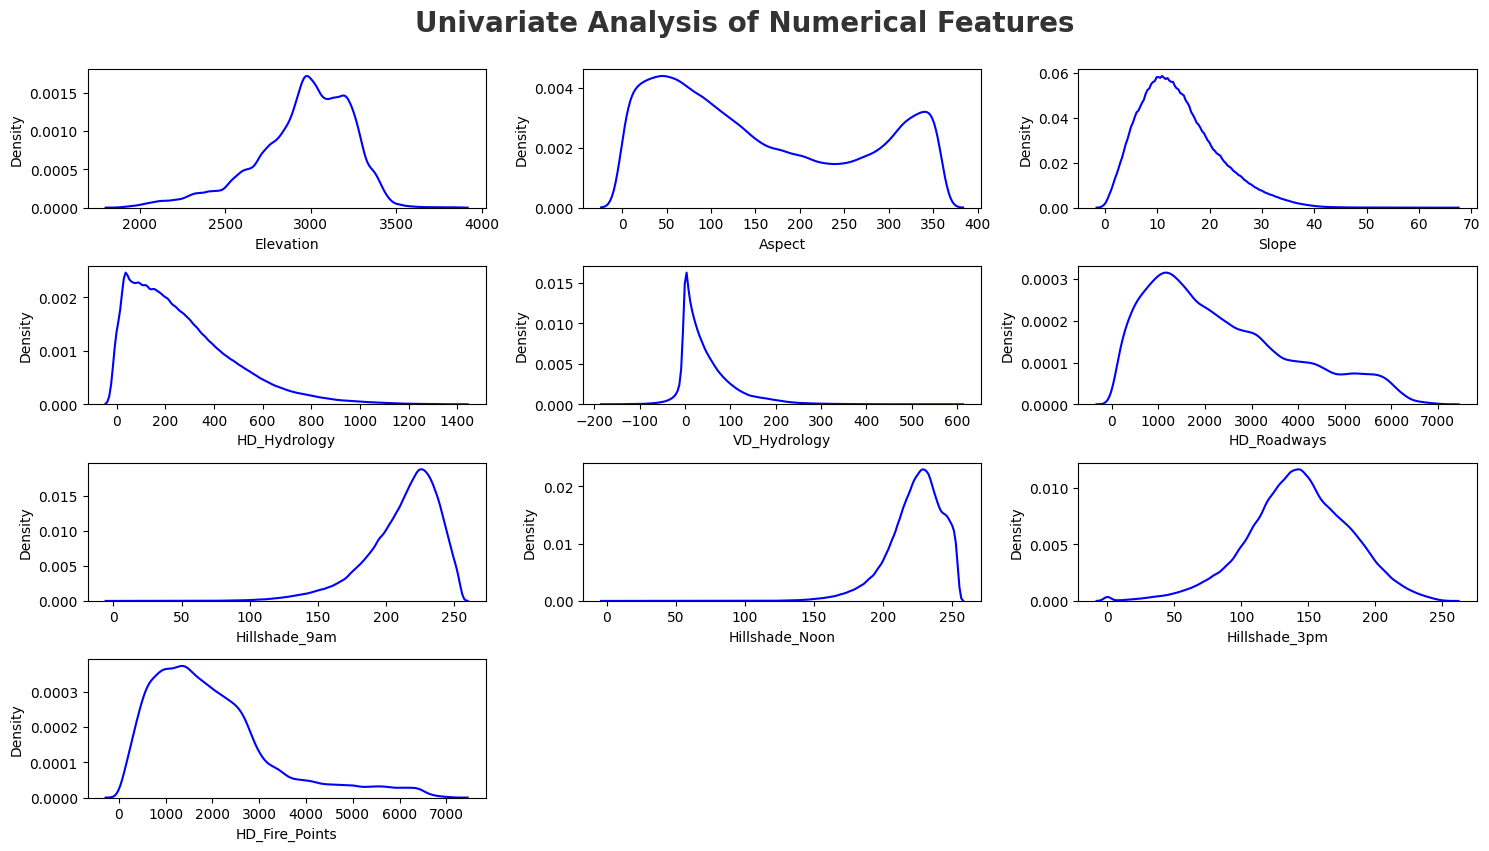

In [23]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# save plot
# plt.savefig('./images/Univariate_Num.png')

 Univariate Analysis of Numerical Features (Detailed)
1. Elevation
Distribution Shape: Slightly right-skewed and unimodal.

Peak Density: Around 3000m.

Spread: Values range from ~1800 to ~4000.

Outliers: Slight indication of low-density tails on both ends; mild outliers on the lower and higher ends possible.

Conclusion: Most observations are around 2800–3200m; might benefit from standardization.

2. Aspect
Distribution Shape: Bimodal.

Peaks: One near 50°, another near 320°.

Spread: Full 0–360° range (as expected for aspect angle).

Outliers: No clear outliers since this is a cyclical feature (e.g., 0° ≈ 360°).

Conclusion: May require circular transformation (e.g., sin, cos) for modeling.

3. Slope
Distribution Shape: Strong right-skew.

Peak: Near 10 degrees.

Spread: 0 to ~70.

Outliers: Likely present beyond 40° (uncommon steepness).

Conclusion: Most terrain is relatively flat; few steep slopes could be outliers.

4. Horizontal Distance to Hydrology (HD_Hydrology)
Distribution Shape: Heavily right-skewed.

Peak: Close to 0.

Spread: Up to ~1500m.

Outliers: Strong presence beyond 1000m; these are rare long distances.

Conclusion: May benefit from log transformation.

5. Vertical Distance to Hydrology (VD_Hydrology)
Distribution Shape: Sharp peak at 0; tail toward positive and negative.

Spread: -200 to 600.

Outliers: Strong tail suggests presence of outliers, especially in high positive values.

Conclusion: Zero peak suggests many points are at water level. Consider normalization or clipping outliers.

6. Horizontal Distance to Roadways (HD_Roadways)
Distribution Shape: Right-skewed.

Peak: Around 1000m.

Spread: 0 to 7000m.

Outliers: Clear long tail — values above 5000m could be outliers.

Conclusion: Very large distances from roads are rare and may impact model. Consider clipping or transformation.

7. Hillshade at 9am
Distribution Shape: Left-skewed.

Peak: Around 220–240.

Spread: 0 to 255 (expected, as hillshade is usually 0–255).

Outliers: No clear outliers, distribution is within expected range.

Conclusion: Mostly high early sunlight exposure; fine as-is.

8. Hillshade at Noon
Distribution Shape: Left-skewed.

Peak: Around 220–240.

Spread: 0 to 255.

Outliers: No clear outliers.

Conclusion: Strong noon light across terrain; suitable for modeling directly.

9. Hillshade at 3pm
Distribution Shape: Roughly normal/bell-shaped.

Peak: Near 150.

Spread: 0 to 255.

Outliers: Slight low-end outliers possible.

Conclusion: Afternoon sunlight varies more; this is the most balanced of the hillshade features.

10. Horizontal Distance to Fire Points (HD_Fire_Points)
Distribution Shape: Right-skewed.

Peak: Around 1000m.

Spread: 0 to ~7000m.

Outliers: Strong tail beyond 5000m indicates possible outliers.

Conclusion: Consider transformation or outlier handling.

### Categorical Features

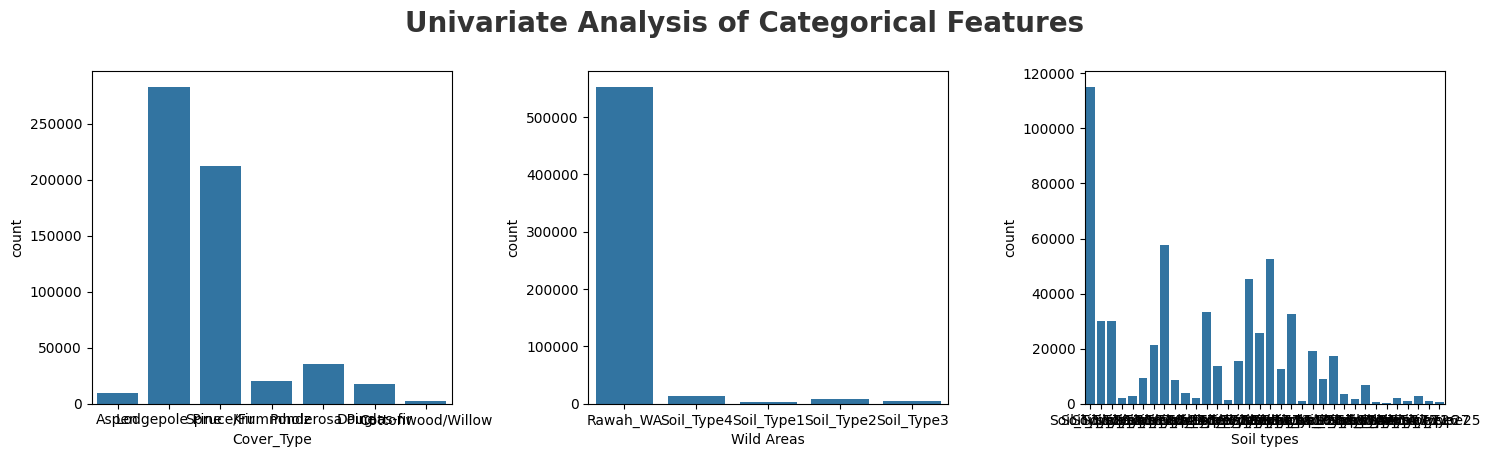

In [26]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

# save plot
# plt.savefig('./images/Univariate_Cat.png')

🔹 1. Cover_Type
This represents different forest cover types (like tree species or vegetation types).

📊 Distribution:
Dominant Types:

Lodgepole Pine – most frequent (~280,000+ samples)

Spruce/Fir – second most (~210,000+ samples)

Less Frequent Types:

Krummholz, Douglas-fir, Ponderosa Pine – moderate frequency

Aspen, Cottonwood/Willow – very few samples

🔍 Insight:
Highly imbalanced distribution.

Lodgepole Pine and Spruce/Fir dominate the dataset.

Important for classification tasks — you’ll need to handle class imbalance (e.g., via oversampling/undersampling or using class weights).

🔹 2. Wilderness Area (Wild Areas)
Binary columns probably representing presence (1) or absence (0) in different wilderness areas.

📊 Distribution:
Rawah_WA is overwhelmingly dominant (>550,000 samples).

Other areas (Soil_Type1 to Soil_Type4 here might be wrongly labeled under this category, probably a plotting error or mismerged data).

🔍 Insight:
One wilderness area (likely Rawah) contributes most data.

Severe imbalance.

May need to drop this feature or treat it carefully during modeling if it doesn’t generalize.

🔹 3. Soil_Type (25 types)
These are likely binary encoded soil types (Soil_Type1 to Soil_Type40).

📊 Distribution:
Soil_Type10 has the highest count (~115,000).

Others like Soil_Type29, Soil_Type38, Soil_Type4, etc. also have moderate frequency.

Several soil types have very few samples, some under 5,000 or even near 0.

🔍 Insight:
Soil types are high-cardinality categorical features.

Highly imbalanced — some soil types are dominant, others very rare.

You may need:

Dimensionality reduction (e.g., group rare types as “Other”)

Or use tree-based models which handle such encoding better.

⚠️ General Observations:
Feature	Imbalance	Comments
Cover_Type	✅ High	Only 2–3 types dominate
Wild Areas	✅ Very High	One area dominates completely
Soil Types	✅ High	40 types, many underrepresented

✅ Recommendations:
🔁 Use resampling techniques to balance target variable (Cover_Type).

📉 Consider dropping or re-encoding Wilderness and Soil types if they introduce noise.

🌳 Prefer models like Random Forest, XGBoost, or CatBoost which handle categorical and imbalanced data better.

## Multivariate Analysis
* Multivariate analysis is the analysis of more than one variable.

In [27]:
discrete_features=[feature for feature in numeric_features if (len(df[feature].unique())<=25 and len(df[feature].unique())>3)]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

encoded_categorical = [feature for feature in numeric_features if len(df[feature].unique()) <=3]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))
print('\nWe have {} encoded_categorical : {}'.format(len(encoded_categorical), encoded_categorical))

We have 0 discrete features : []

We have 10 continuous_features : ['Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hydrology', 'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'HD_Fire_Points']

We have 0 encoded_categorical : []


In [28]:
categorical_features = categorical_features + encoded_categorical
print(categorical_features)

['Cover_Type', 'Wild Areas', 'Soil types']


### Check Multicollinearity in Numerical features

In [29]:
df[(list(df[continuous_features])[1:])].corr()

Aspect     Slope  HD_Hydrology  VD_Hydrology  HD_Roadways  \
Aspect          1.000000  0.078728      0.017376      0.070305     0.025121   
Slope           0.078728  1.000000     -0.010607      0.274976    -0.215914   
HD_Hydrology    0.017376 -0.010607      1.000000      0.606236     0.072030   
VD_Hydrology    0.070305  0.274976      0.606236      1.000000    -0.046372   
HD_Roadways     0.025121 -0.215914      0.072030     -0.046372     1.000000   
Hillshade_9am  -0.579273 -0.327199     -0.027088     -0.166333     0.034349   
Hillshade_Noon  0.336103 -0.526911      0.046790     -0.110957     0.189461   
Hillshade_3pm   0.646944 -0.175854      0.052330      0.034902     0.106119   
HD_Fire_Points -0.109172 -0.185662      0.051874     -0.069913     0.331580   

                Hillshade_9am  Hillshade_Noon  Hillshade_3pm  HD_Fire_Points  
Aspect              -0.579273        0.336103       0.646944       -0.109172  
Slope               -0.327199       -0.526911      -0.175854       -0.185662  
HD_Hydrology        -0.027088        0.046790       0.052330        0.051874  
VD_Hydrology        -0.166333       -0.110957       0.034902       -0.069913  
HD_Roadways          0.034349        0.189461       0.106119        0.331580  
Hillshade_9am        1.000000        0.010037      -0.780296        0.132669  
Hillshade_Noon       0.010037        1.000000       0.594274        0.057329  
Hillshade_3pm       -0.780296        0.594274       1.000000       -0.047981  
HD_Fire_Points       0.132669        0.057329      -0.047981        1.000000

 Understanding the Correlation Matrix
Correlation values range from -1 to +1:

+1: Perfect positive correlation

-1: Perfect negative correlation

0: No correlation

Typically:

> 0.5 or < -0.5 = strong

0.3 to 0.5 or -0.3 to -0.5 = moderate

< 0.3 or > -0.3 = weak

🔍 Key Correlations Observed
✅ Strong Correlations
Feature Pair	Correlation	Interpretation
Hillshade_3pm & Hillshade_9am	-0.78	Strong negative correlation — if one increases, the other decreases significantly. Likely due to sun position changing across the day.
Hillshade_3pm & Hillshade_Noon	+0.59	Strong positive correlation — both increase together.
Hillshade_9am & Aspect	-0.58	Higher aspect (terrain direction) results in lower 9am sun exposure.
VD_Hydrology & HD_Hydrology	+0.61	Vertical and horizontal distance to water are related — possibly topographical.

🟨 Moderate Correlations
Feature Pair	Correlation	Interpretation
Slope & VD_Hydrology	+0.27	Steeper slopes likely near elevation changes from water bodies.
Hillshade_Noon & Hillshade_9am	+0.01	Very weak — indicates no strong relation between 9am and noon lighting.
Hillshade_Noon & HD_Roadways	+0.18	Some relationship between road locations and sun exposure at noon.
Aspect & Hillshade_3pm	+0.65	Higher aspect leads to more sun at 3pm — terrain orientation affects sun angles.
HD_Fire_Points & HD_Roadways	+0.33	Fires tend to occur closer to roads, likely due to accessibility or human activity.

❌ Weak or Negligible Correlations
Most other feature pairs have correlations in the range of -0.2 to +0.2, suggesting little to no linear relationship. Examples:

Feature Pair	Correlation	Note
HD_Hydrology & Slope	-0.01	No meaningful relation
HD_Hydrology & HD_Fire_Points	+0.05	Very weak
Aspect & HD_Roadways	+0.02	Minimal

🧠 Takeaways & Modeling Implications
✅ Multicollinearity is not a major concern here (most features are not highly correlated), except:

Between Hillshade features (especially 3pm & 9am → -0.78, and 3pm & noon → +0.59)

Between VD_Hydrology & HD_Hydrology (0.61)

If you're using linear models (like logistic regression), you might want to drop or combine correlated features (e.g., Hillshade).

🌳 Tree-based models (like Random Forest, XGBoost) handle correlated features well, so you don’t need to drop them necessarily.

📉 Use PCA or feature selection if dimensionality is high or interpretability is needed.

<Axes: >

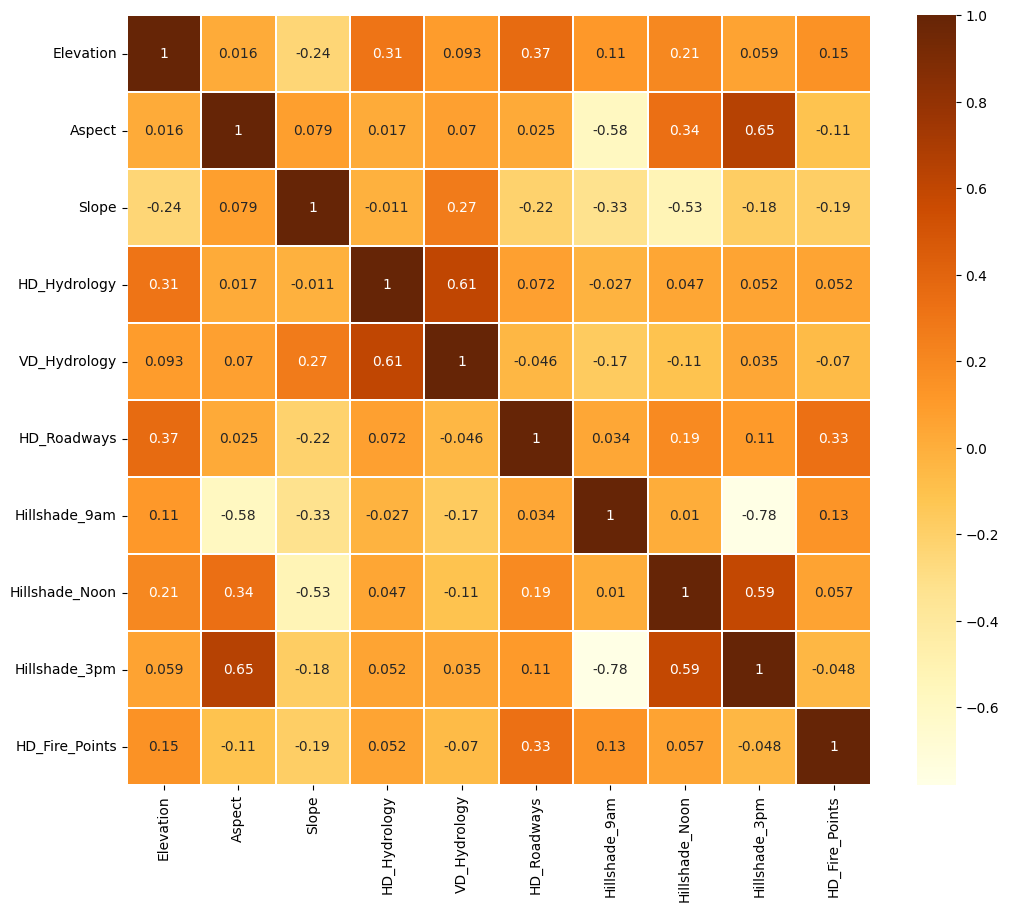

In [30]:
numerical_df = df.select_dtypes(include=np.number)

fig=plt.figure(figsize=(12,10))
sns.heatmap(numerical_df.corr(),annot=True,linewidths=.3,cmap='YlOrBr')

#### Inferences (Correlated Features)
- Elevation and Horizontal Distance to Roadways.
- Aspect and Hillshade at 9am
- Aspect and Hillshade at 3pm
- Slope and Hillshade at Noon
- Horizontal Distance to hydrology and Vertical Distance to Hydrology
- Hillshade at 9am and Hillshade at 3pm
- Hillshade at 3pm and Hillshade at Noon

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e ProdTaken**

**Null Hypothesis ($ H_0 $)**: The Feature is independent of target column (No-Correlation)

**Alternative Hypothesis ($ H_1 $)**: The Feature and Target column are not independent (Correlated)

In [31]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Cover_Type'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

Column       Hypothesis Result
0  Cover_Type  Reject Null Hypothesis
1  Wild Areas  Reject Null Hypothesis
2  Soil types  Reject Null Hypothesis

### Checking Null Values

In [32]:
df.isnull().sum()

Elevation         0
Aspect            0
Slope             0
HD_Hydrology      0
VD_Hydrology      0
HD_Roadways       0
Hillshade_9am     0
Hillshade_Noon    0
Hillshade_3pm     0
HD_Fire_Points    0
Cover_Type        0
Wild Areas        0
Soil types        0
dtype: int64

#### How is the data distribution of our target column 'Cover_Type' ?

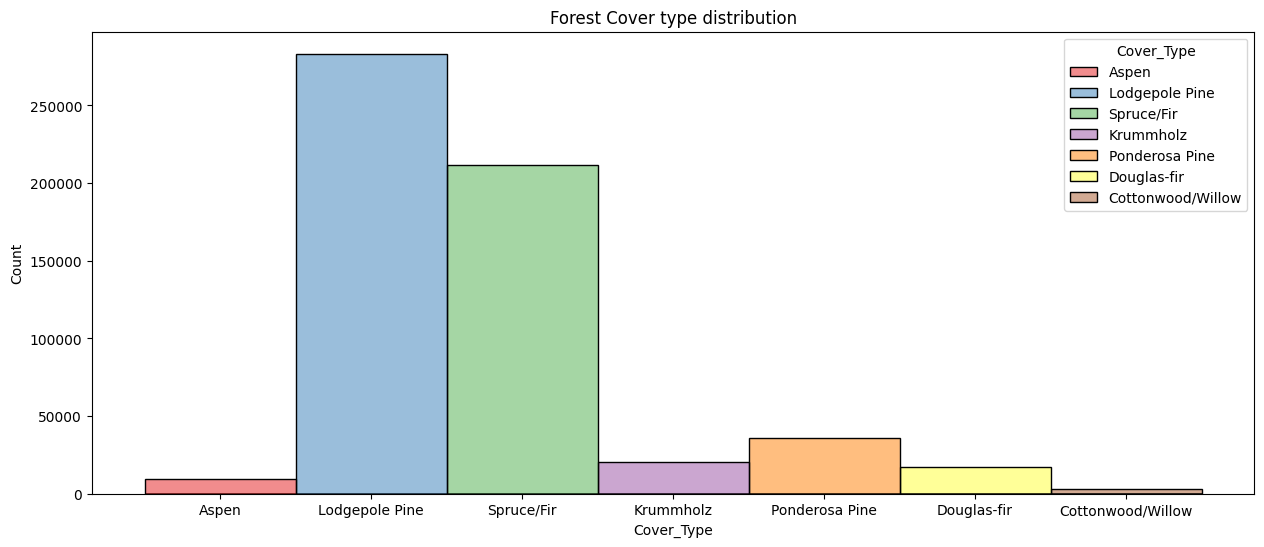

In [33]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x="Cover_Type", hue = 'Cover_Type', palette='Set1')
plt.title('Forest Cover type distribution')
plt.show()

#### INFERENCE
- we can see 'Lodgepole Pine' has largest forest cover.
- 'Cottonwood/Willow' has lowest forest cover.

#### Which Wild area has what kind of Forest cover ?

<Axes: xlabel='Wild Areas'>

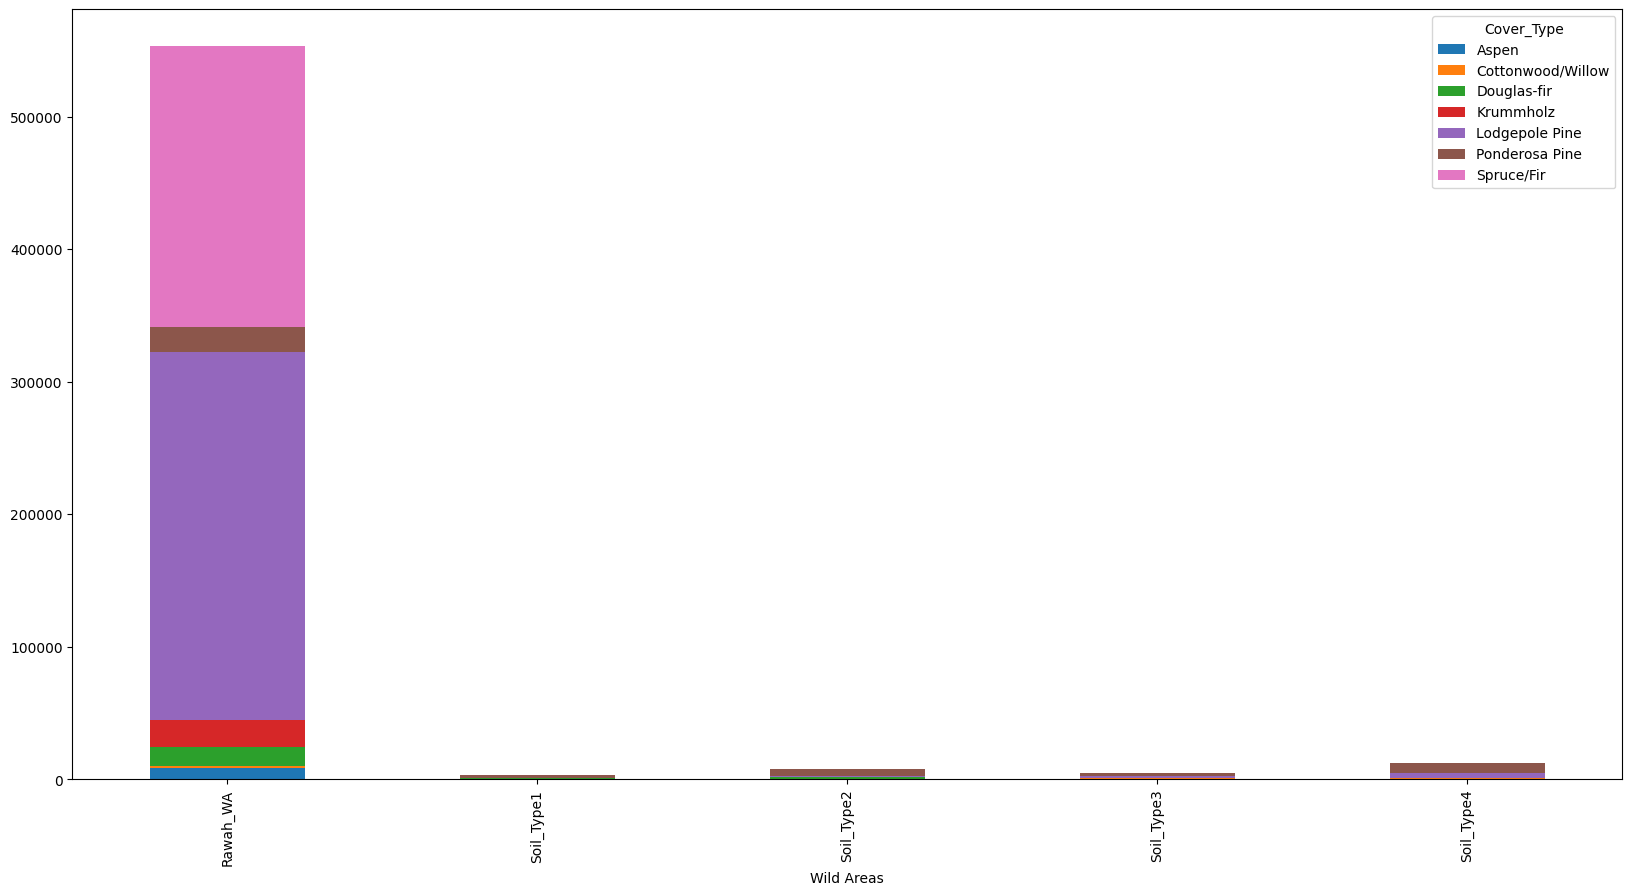

In [34]:
wild_area_cover_type=df.groupby(['Wild Areas'])['Cover_Type'].value_counts().unstack()
wild_area_cover_type.plot(kind='bar', stacked=True,figsize=(20,10))

#### INFERENCES
- Cache_La_Poudre and Neota Wilderness Areas have same number of forest covers
- Comanche_Peak accounts for 42% of the total Wild Areas data.
- The least data is for Neota Wild Area i.e 3.3% in our data.
- We can also see that none of the wild areas have all the types of forest covers

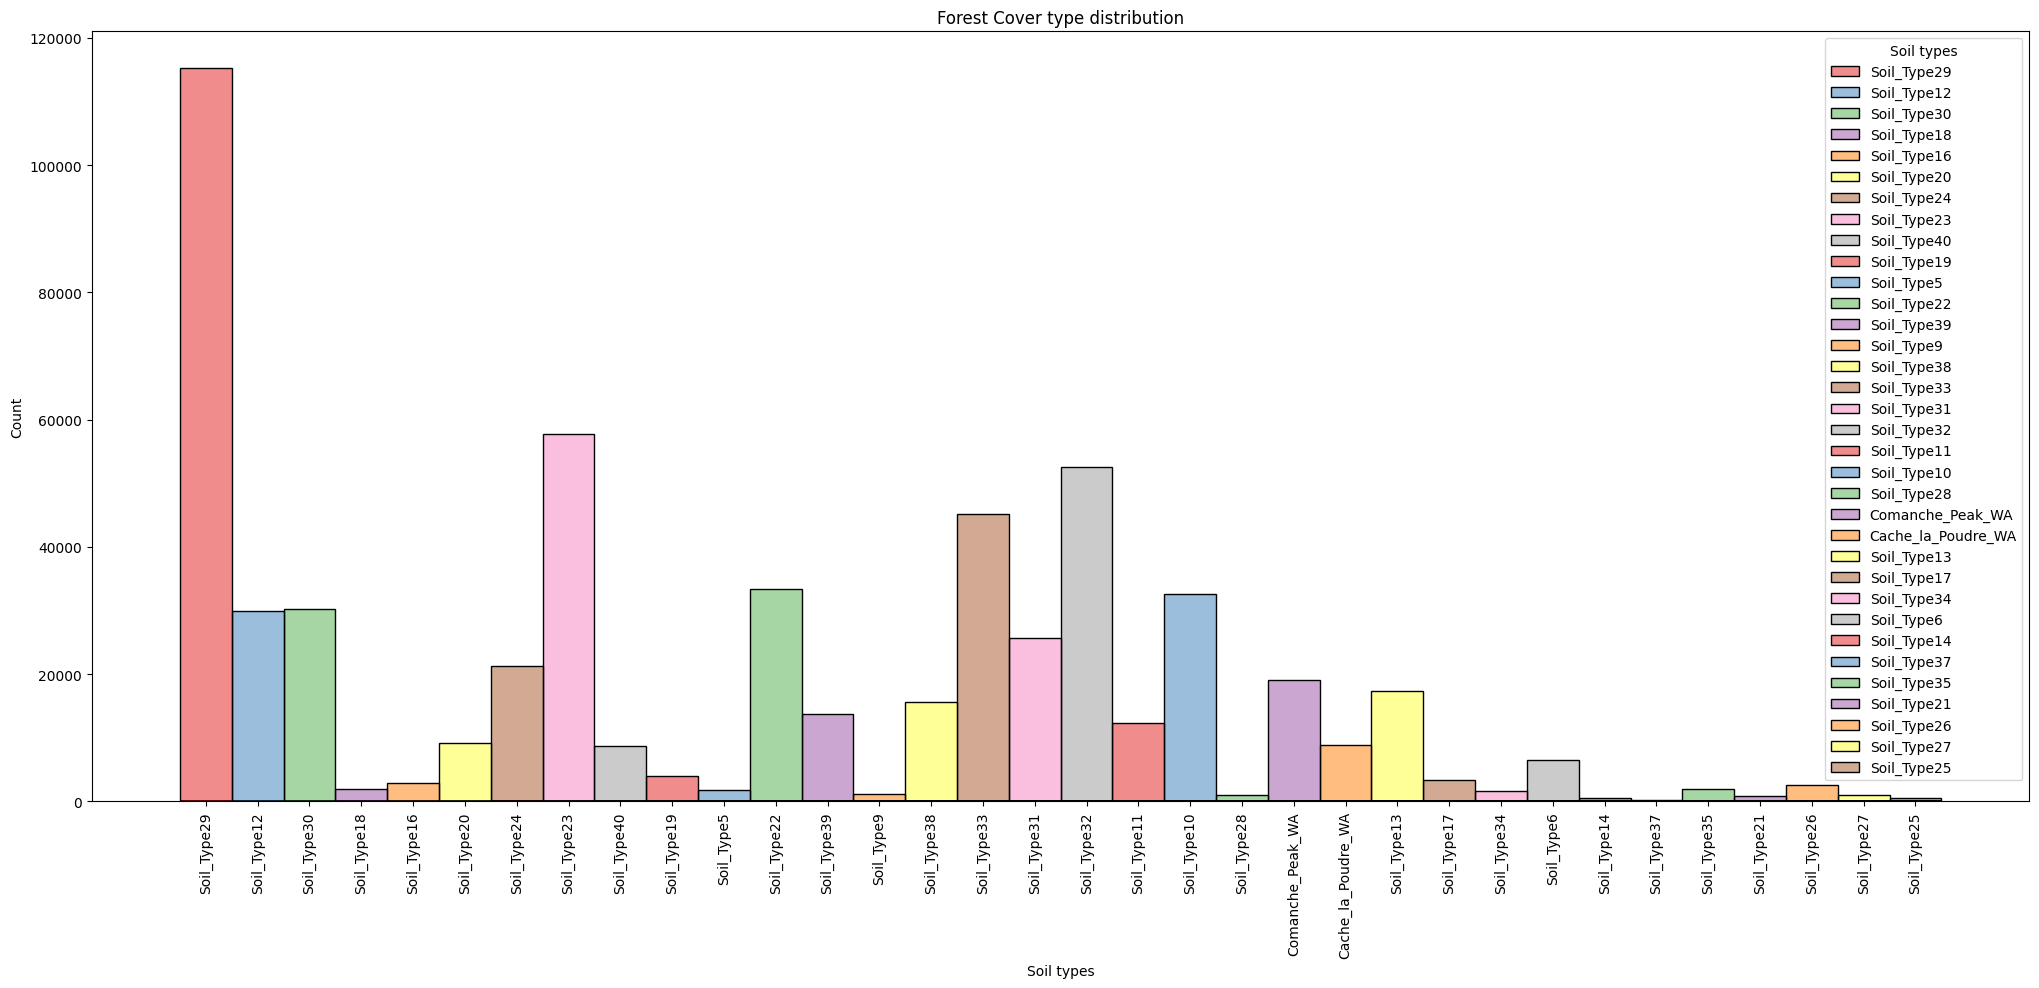

In [35]:
plt.figure(figsize=(25,10))
sns.histplot(data=df, x="Soil types", hue = 'Soil types', palette='Set1')
plt.title('Forest Cover type distribution')
plt.xticks(rotation=90)
plt.show()


#### INFERENCE
- We have most of the data for soil type 29 and 23.
- Many soil types are rare in our data

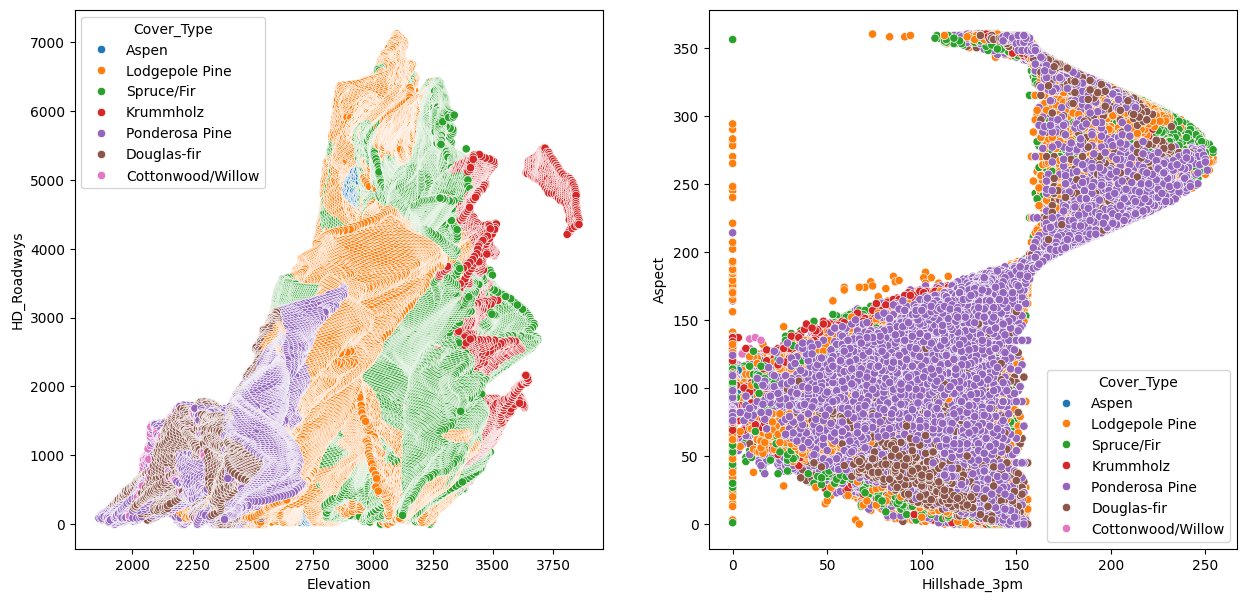

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.scatterplot(data=df,y='HD_Roadways',x='Elevation', hue='Cover_Type')
plt.subplot(122)
sns.scatterplot(data=df,y='Aspect',x='Hillshade_3pm', hue='Cover_Type')
plt.show()

#### Inference
- We can see a positive correlation between Elevation and Distance to Roadways.
- Cottonwood trees have the lowest Elevation and distance to roadways compared to other forest covers.
- Douglas trees grow on lower elevated areas but higher than compared to cottonwood trees.
- All Krummholz trees grow on higher elevated areas but we can see a variation in their distance to roadways value.

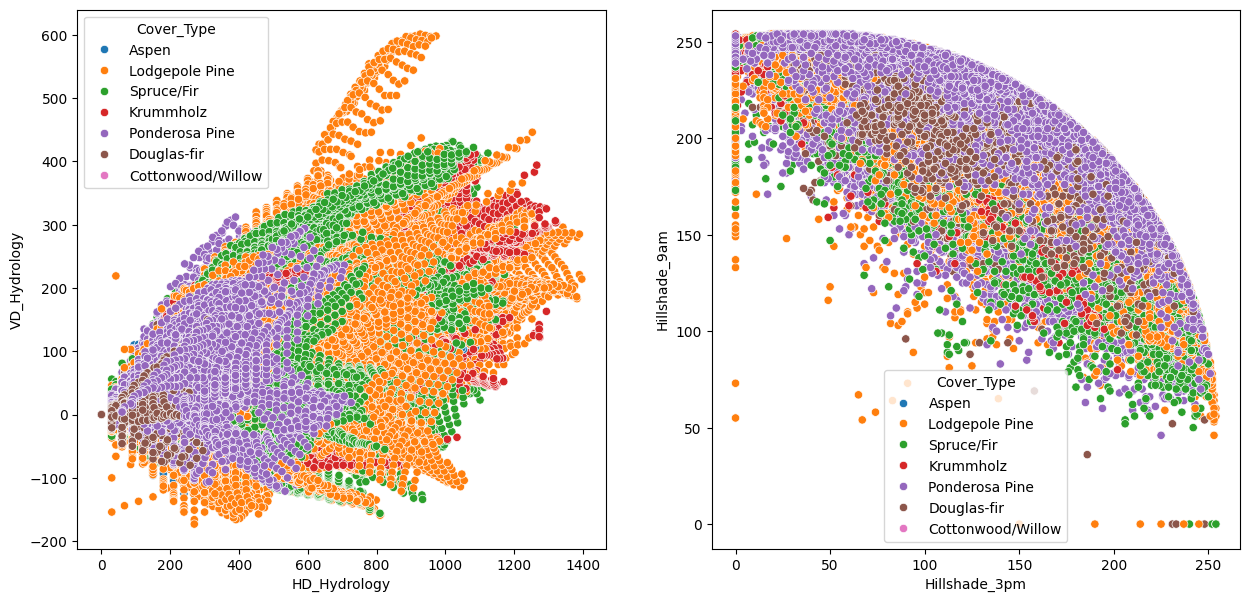

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.scatterplot(data=df,y='VD_Hydrology',x='HD_Hydrology', hue='Cover_Type')
plt.subplot(122)
sns.scatterplot(data=df,y='Hillshade_9am',x='Hillshade_3pm', hue='Cover_Type')
plt.show()

#### Inference
- We can see positive correlation between both the distances to hydrology
- This graph is obvious as the shade at 9am will be opposite to the shade at 3pm on the area.
- We can see a negative correlation between hillshade index at 9am and 3pm

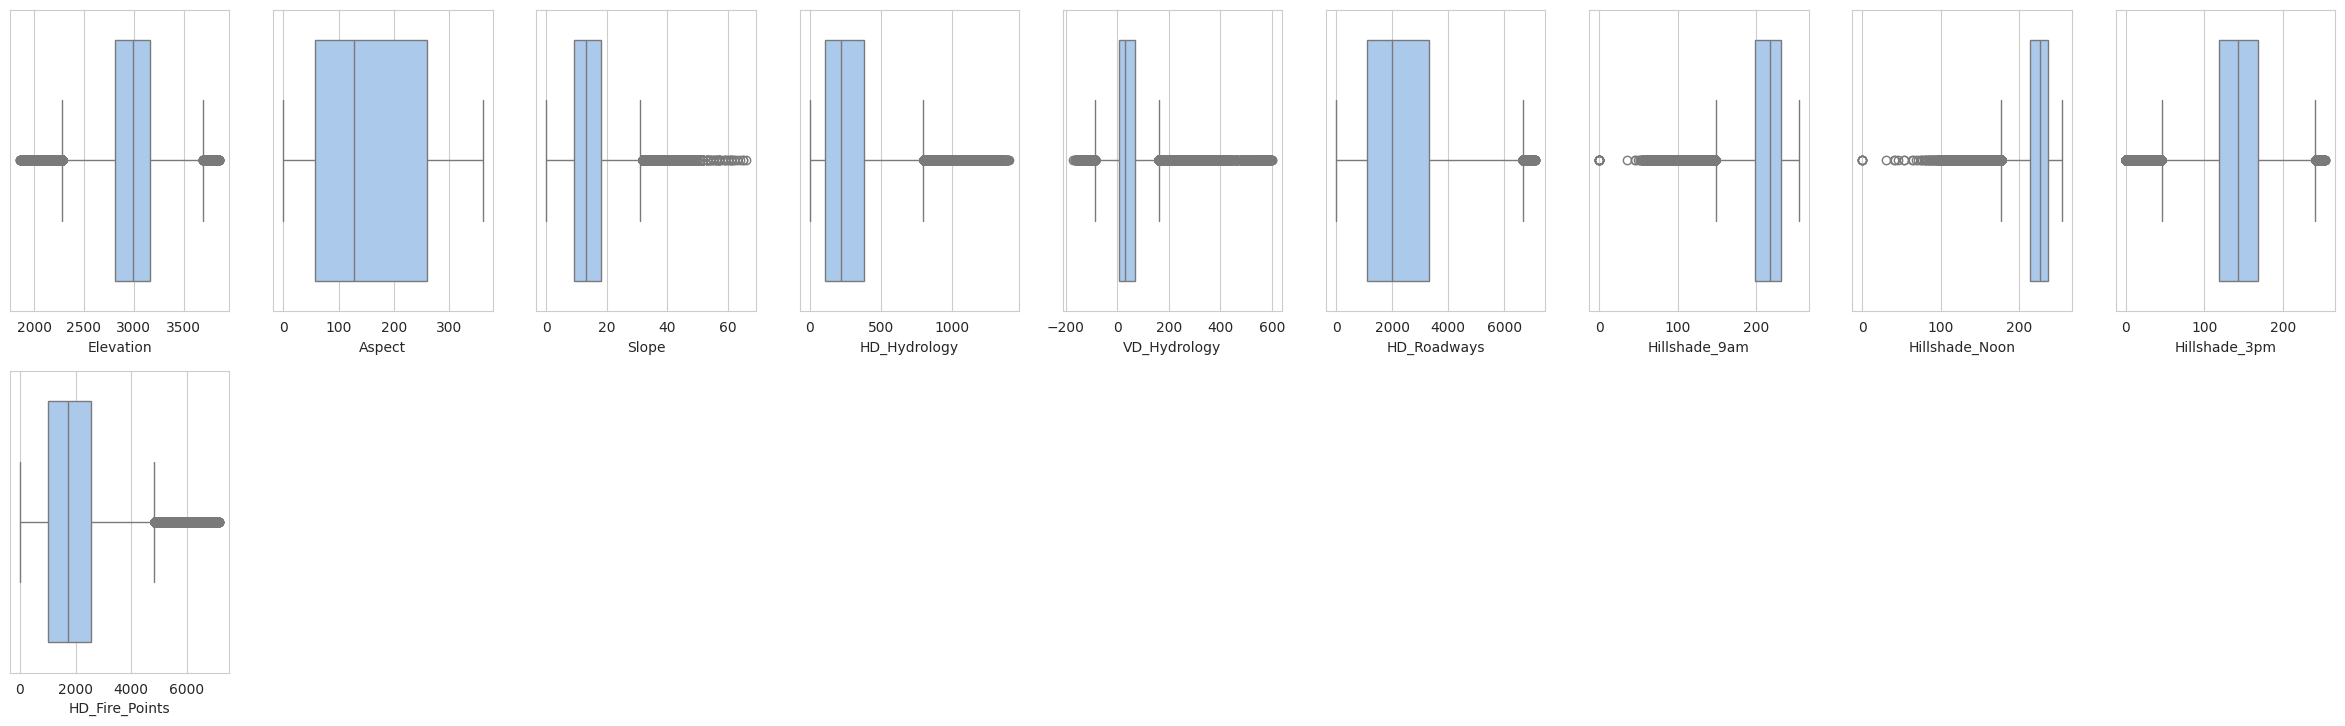

In [38]:
sns.set_style("whitegrid")
color = sns.color_palette('pastel')
plt.figure(figsize=(30,18))
for i,col in enumerate(numeric_features):
    plt.subplot(4,9,i+1)
    sns.boxplot(df[col], orient='h', palette=color)

#### Inference
- Slope is the most squeezed box plot. It having a least range means that the median and mean will be quite close.
- Aspect features is the only one with little to none outliers.
- Elevation is the only feature that doesn't have a minimum value of 0. It is instead plotted in the middle having many outliers too.
- Horizontal_Distance_To_Roadways has the most spread out data of all features. This is because it has highest standard deviation score. Horizontal_Distance_To_Fire_Points has a similar look, but it has the maximum value.
- If we compare these two features, the last 50% of Horizontal_Distance_To_Roadways is much more spread and less dense compared to Horizontal_Distance_To_Fire_Points, hence having a high standard deviation score.

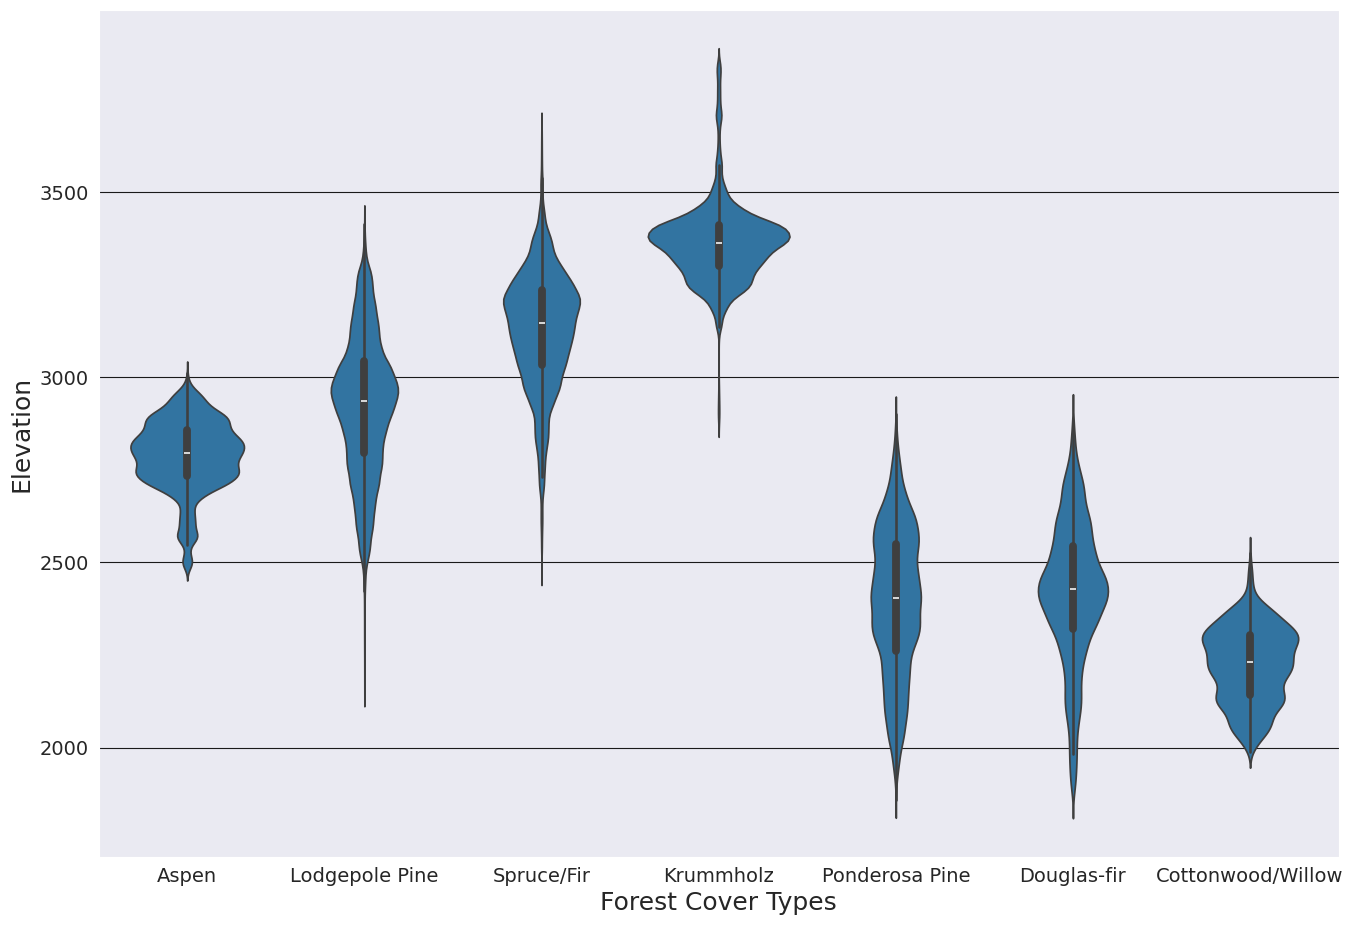

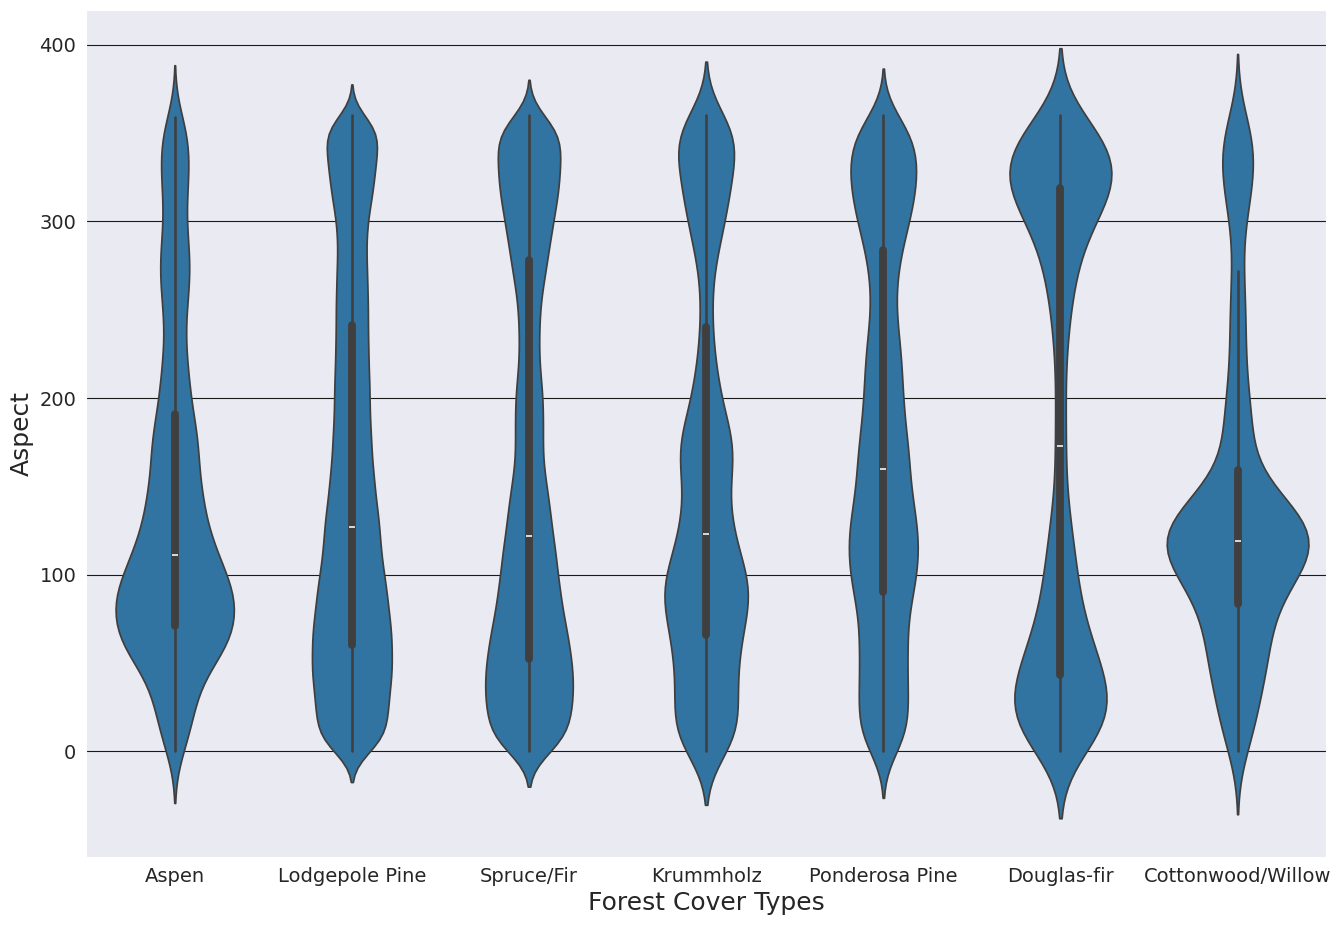

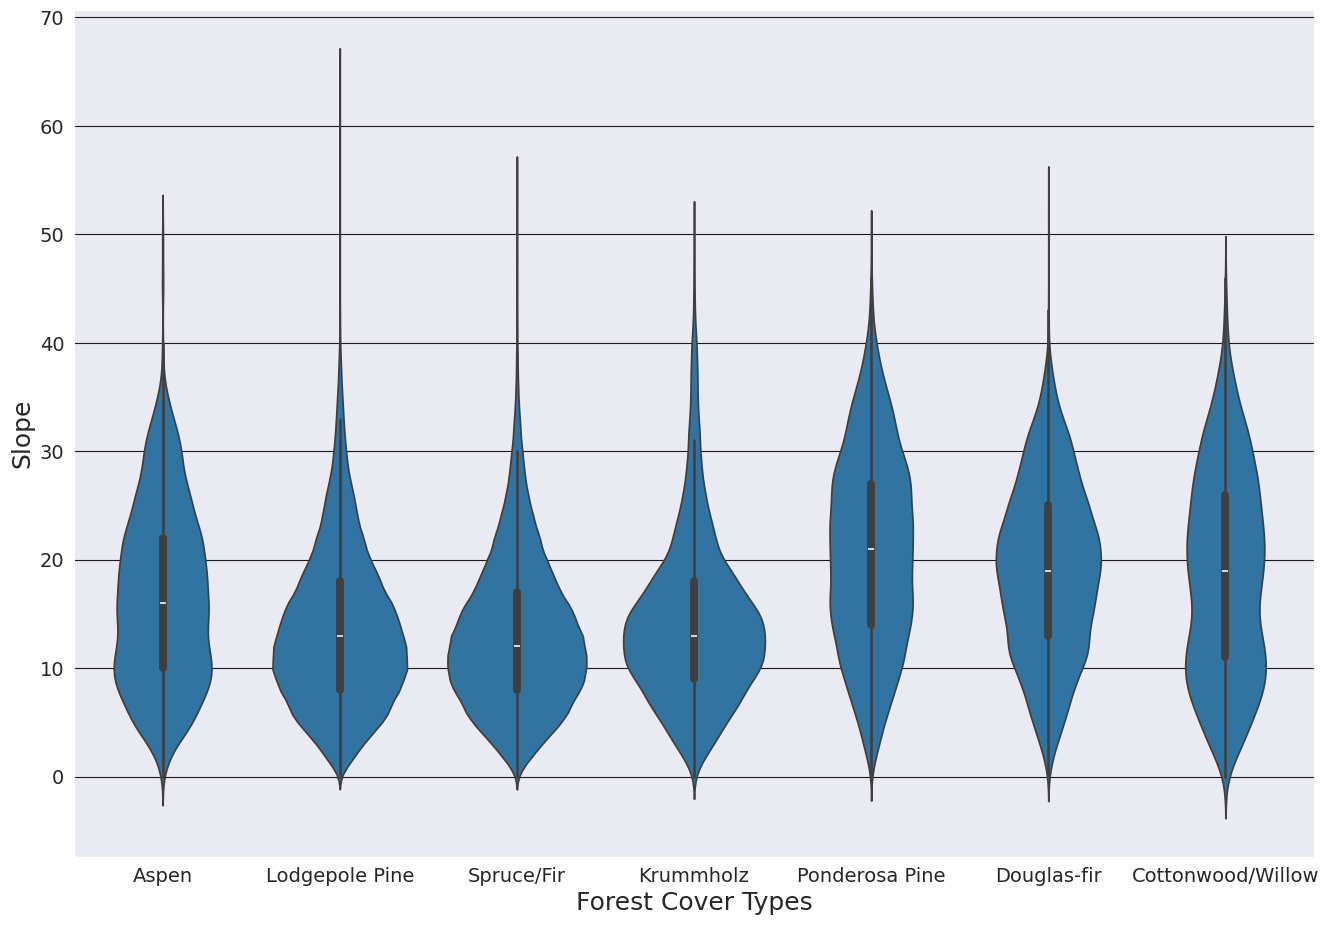

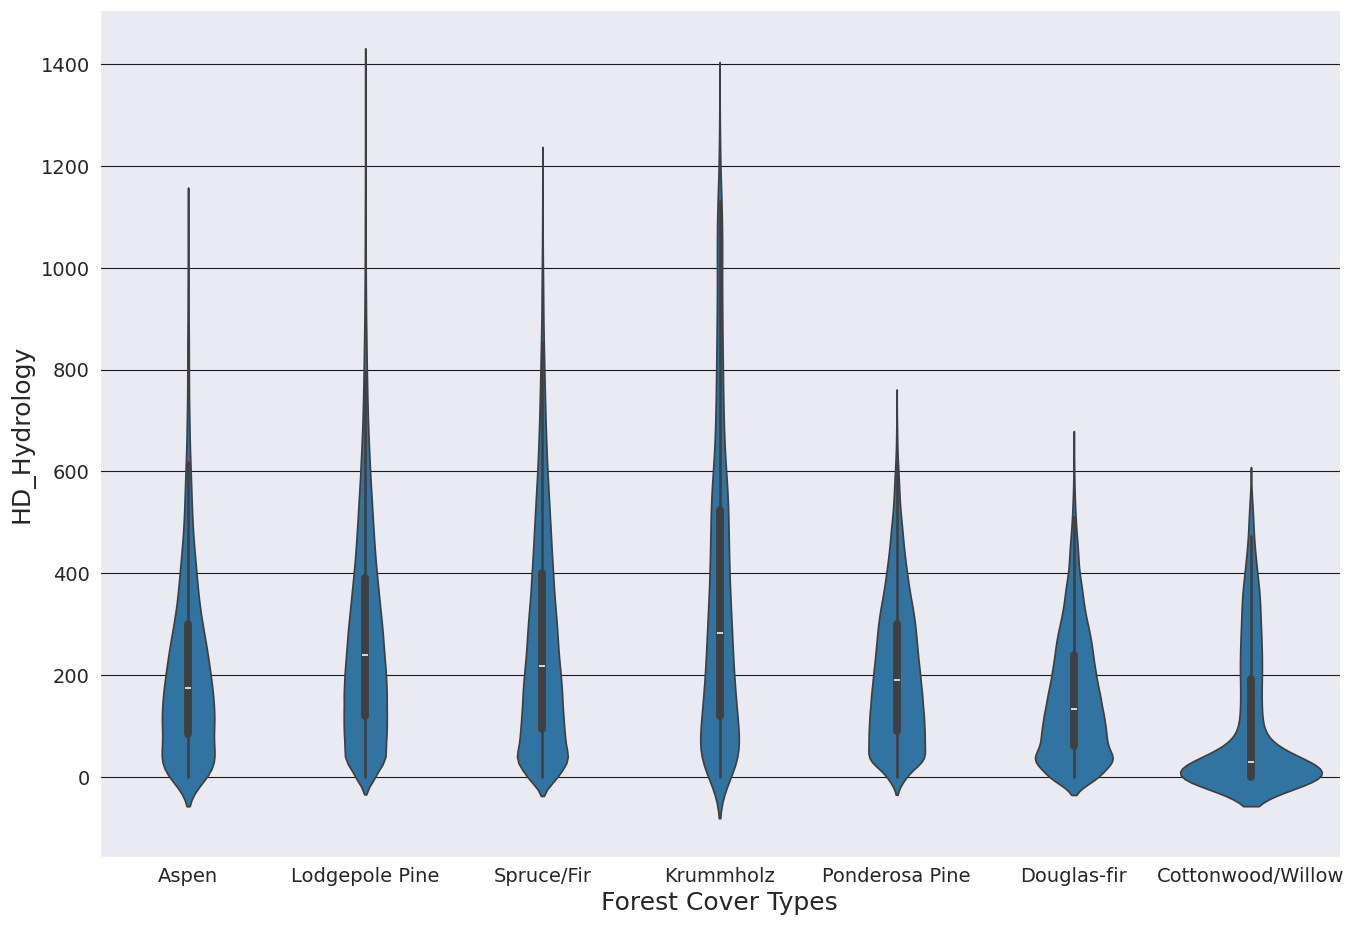

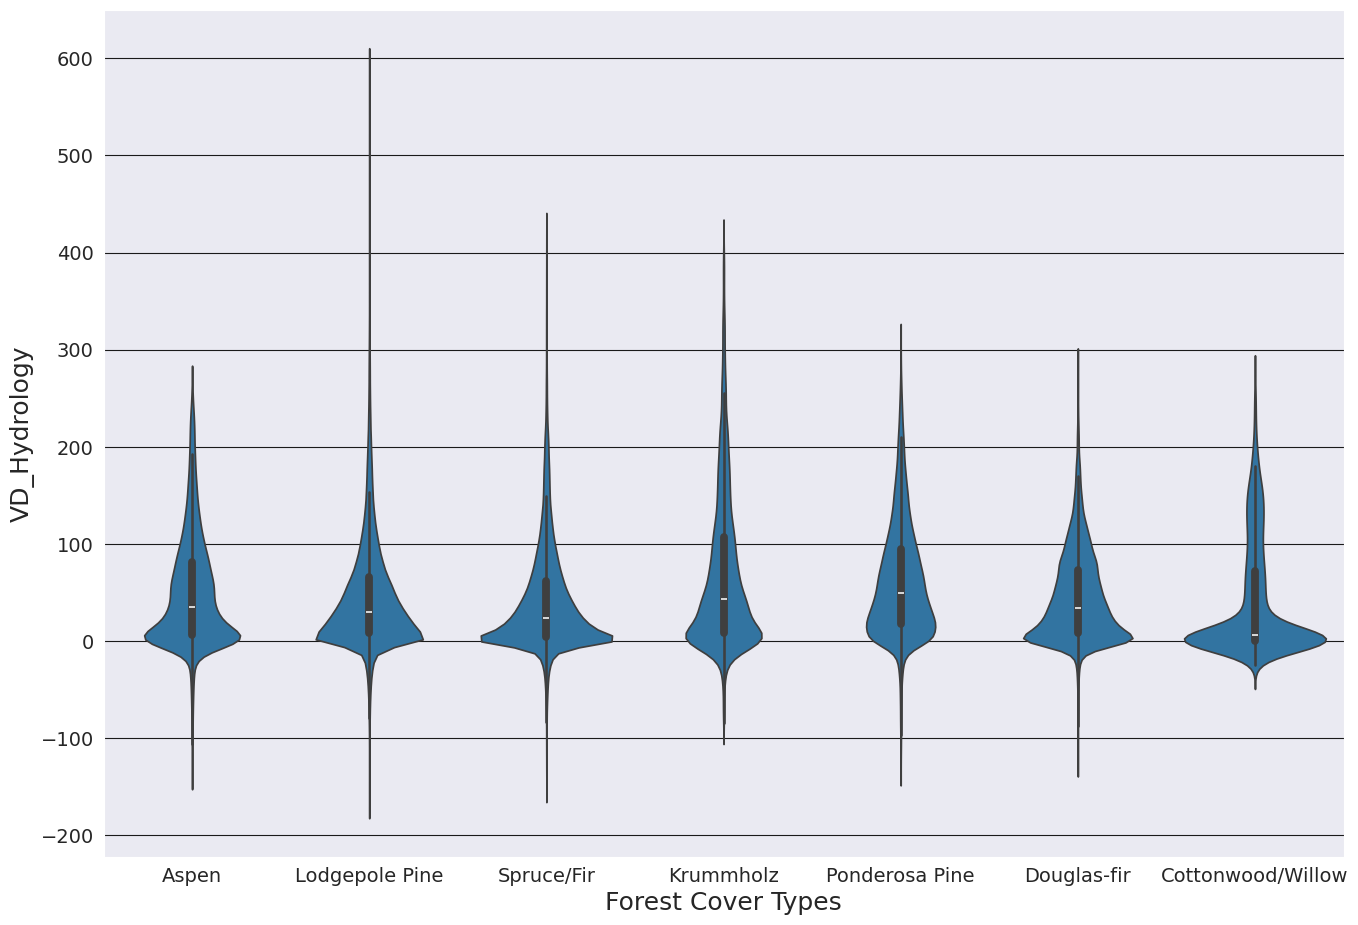

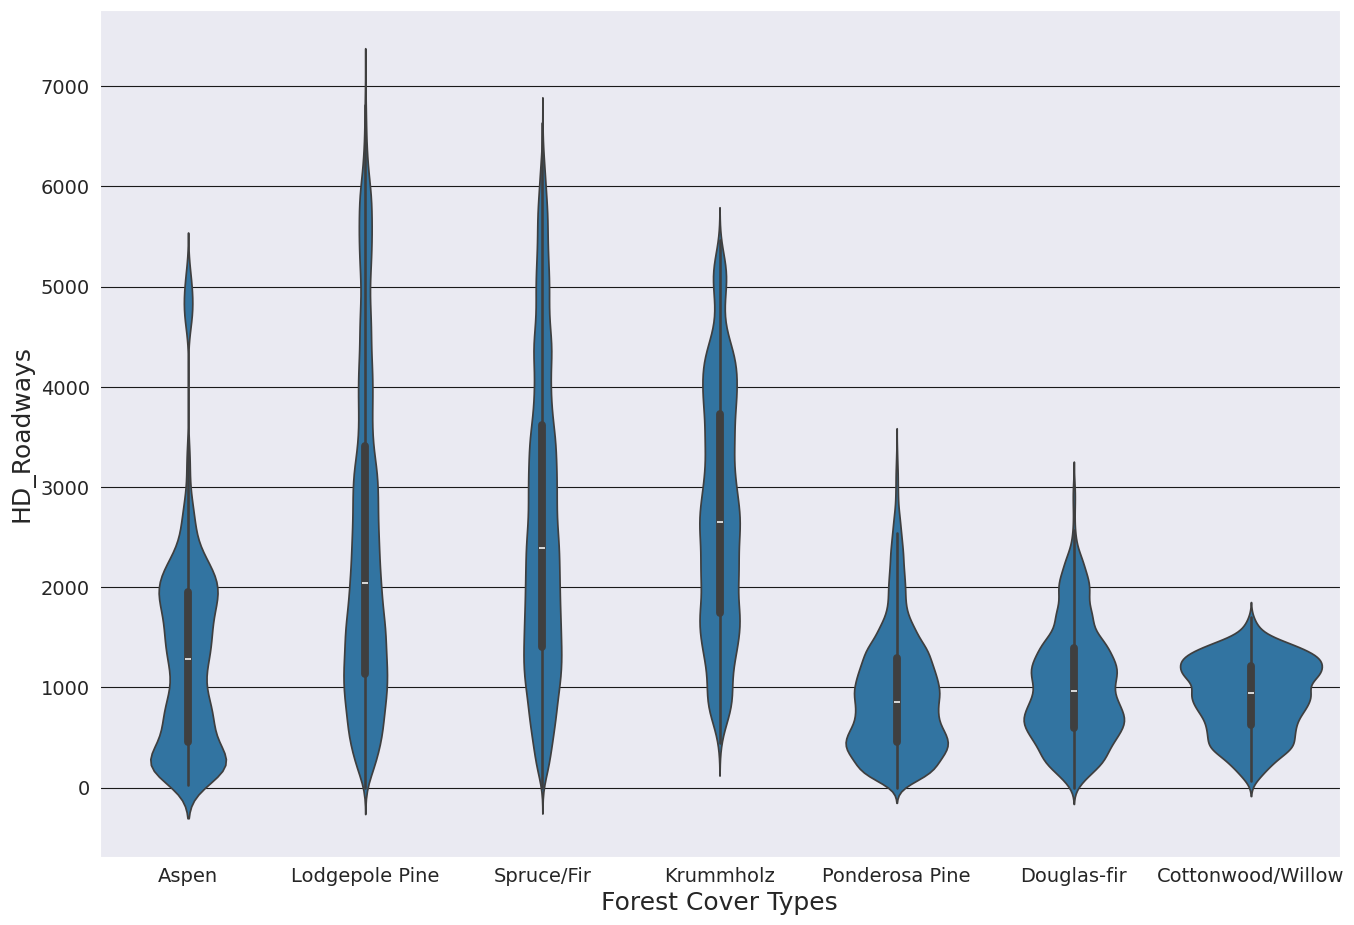

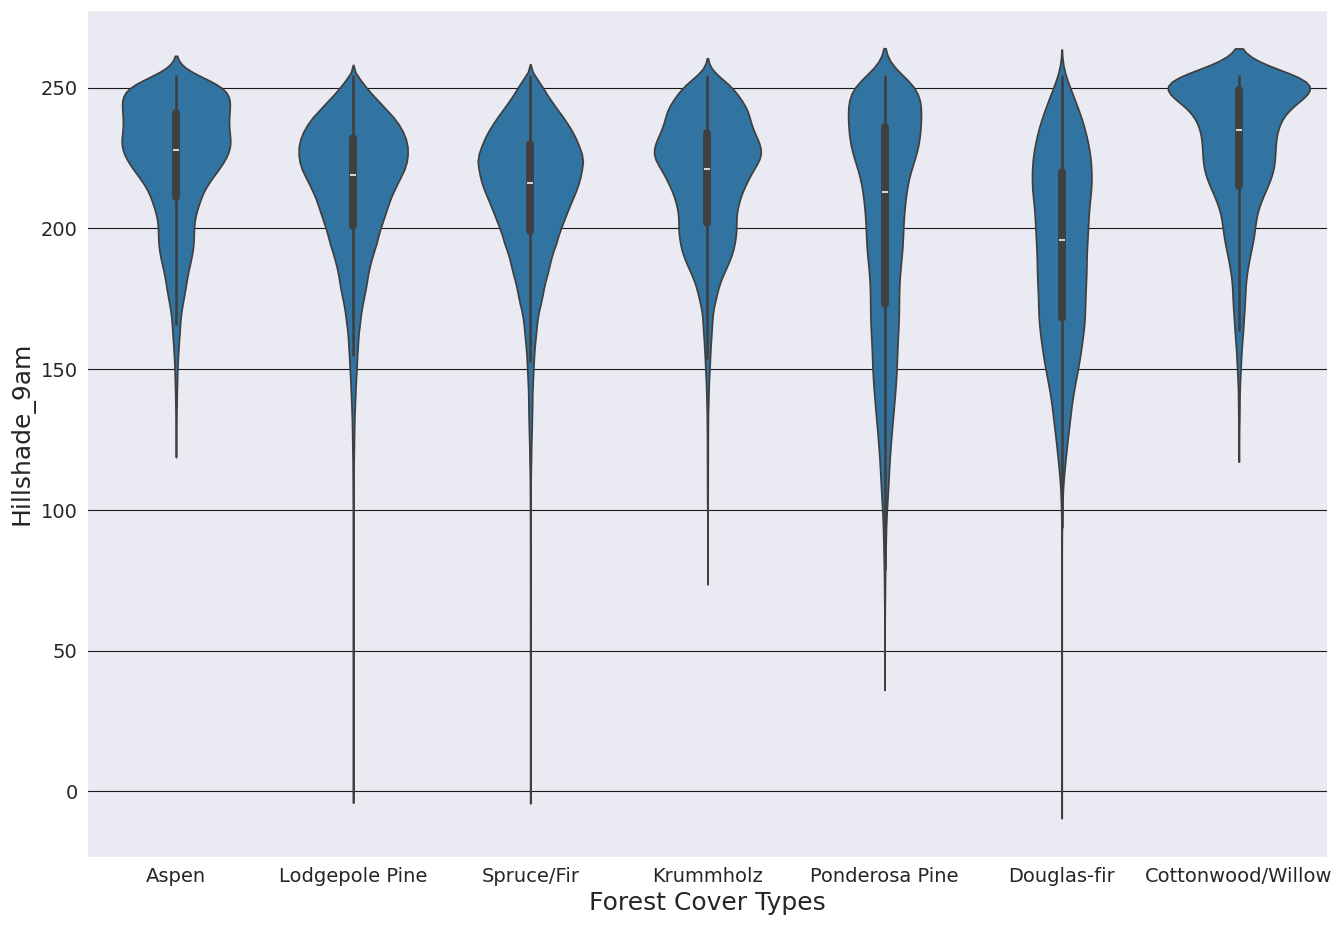

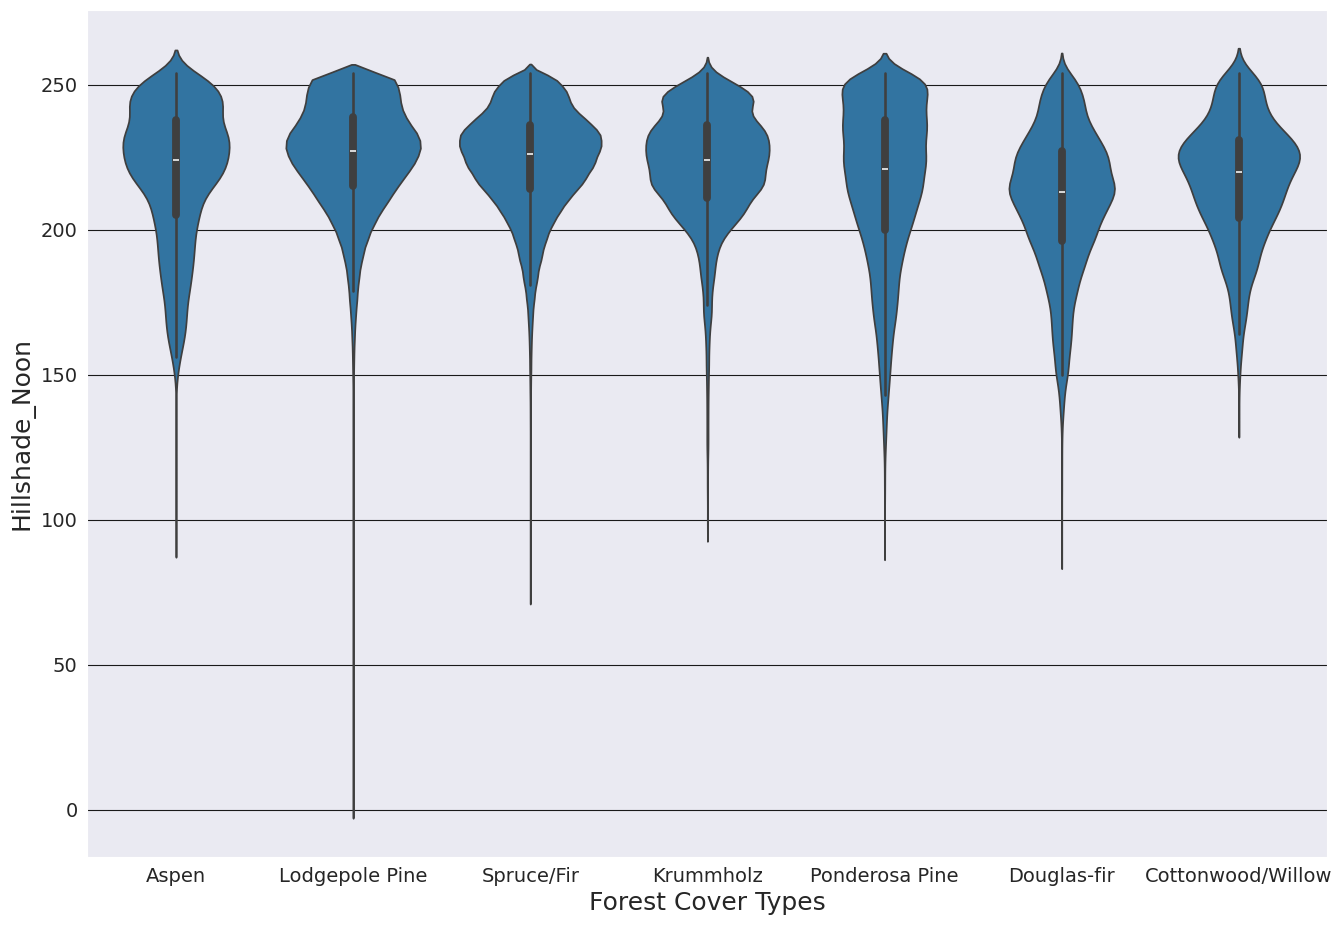

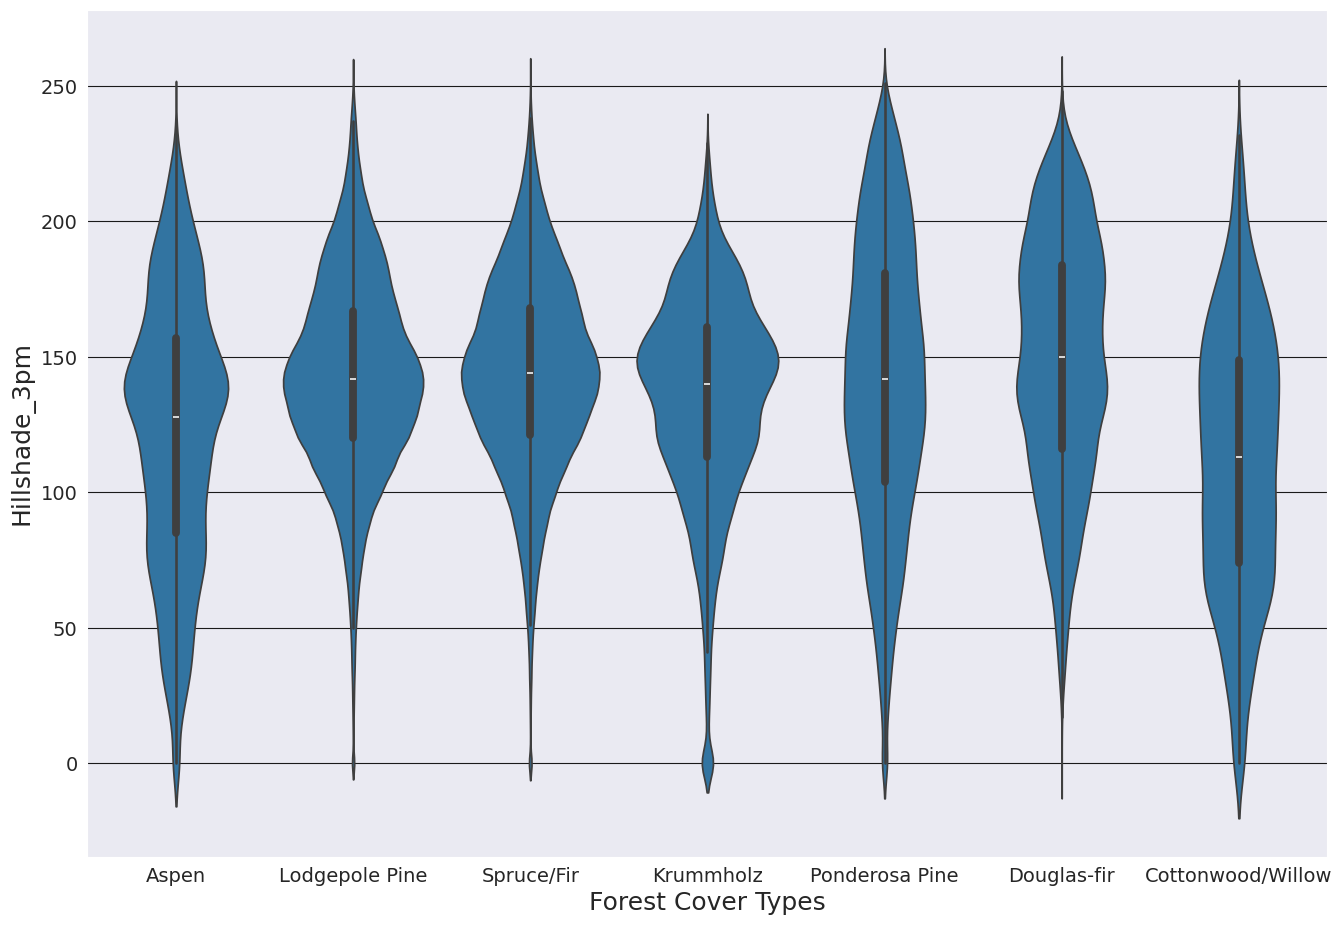

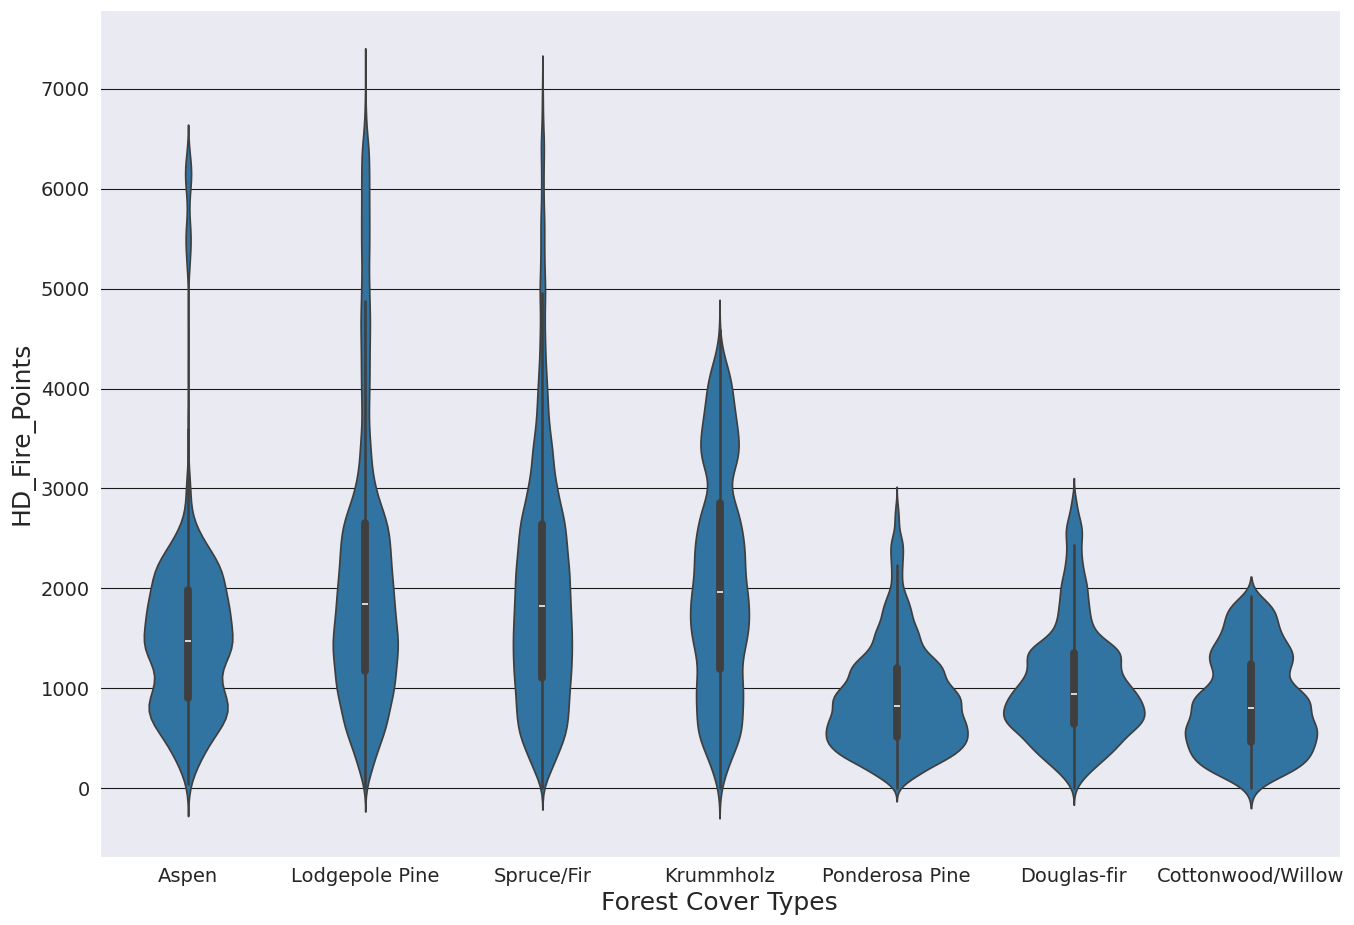

In [39]:
# extract all numerical features from train
num_features = df.iloc[:,:10]

# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# set target variable
target = df['Cover_Type']

# features to be compared with target variable
features = num_features.columns

# loop for violin plot
for i in range(0, len(features)):
    plt.subplots(figsize=(16,11))
    sns.violinplot(data=num_features, x=target, y=features[i])
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.xlabel('Forest Cover Types', size=18)
    plt.ylabel(features[i], size=18)
    plt.show()

#### Infernces
- Elevation
    - 'Cottonwood/Willow' has the most forest cover at elevation between 2000m - 2500m.
    - 'Krummholz' has observations of most elevated trees ranging as low as ~2800m to as high as ~3800m.
- Aspect
    -  This feature has a normal distribution for each class.
- Slope
    -  Slope has lower values compared to most features as its measured in degrees and least to Aspect which is also measured in degrees.
    -  It has the least maximum value of all features. Looking at the plot we can say that it belongs to Cover_Type2.
    -  All classes have dense slope observations between 0-20 degrees.
- Hillshade_9am and Hillshade_Noon are left or negatively skewed distribution where they take on max value between 200-250 index value for most observation in each class.

    

<Axes: xlabel='Hillshade_Noon', ylabel='Hillshade_3pm'>

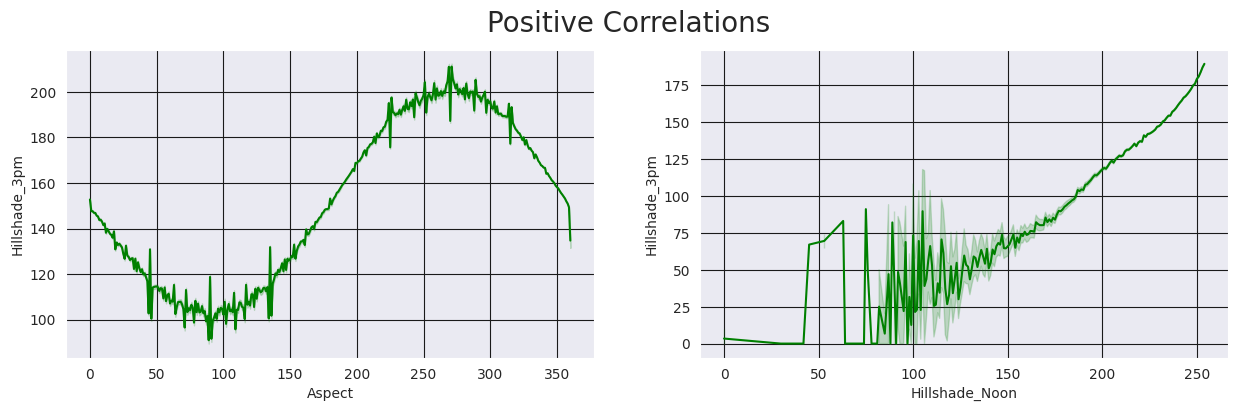

In [40]:
fig, axs = plt.subplots(ncols=2,figsize=(15,4))
fig.suptitle("Positive Correlations",fontsize='20')

sns.lineplot(x= "Aspect",y="Hillshade_3pm",data=df,color='green',ax=axs[0])
sns.lineplot(x= "Hillshade_Noon",y="Hillshade_3pm",data=df,color='green',ax=axs[1])

<Axes: xlabel='Hillshade_Noon', ylabel='Slope'>

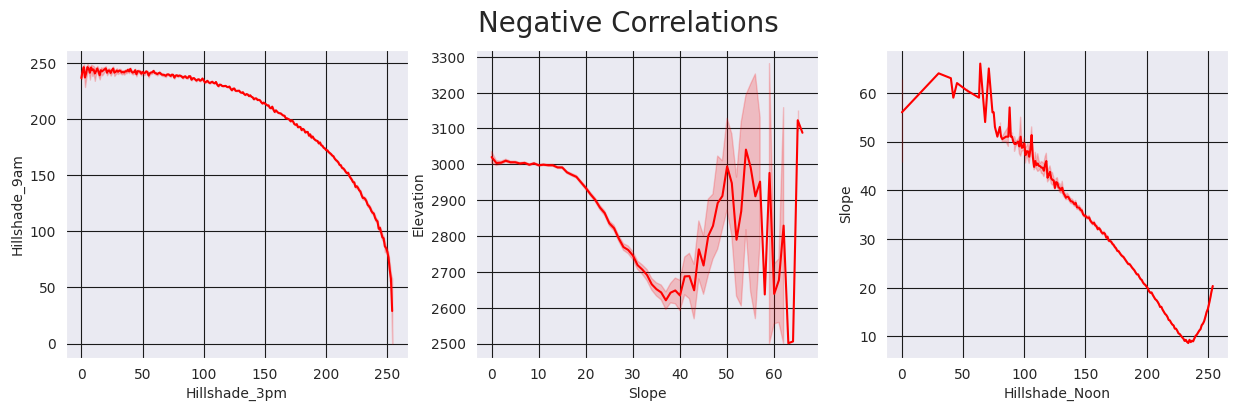

In [41]:
fig, axs = plt.subplots(ncols=3,figsize=(15,4))
fig.suptitle("Negative Correlations",fontsize='20')

sns.lineplot(x= "Hillshade_3pm",y="Hillshade_9am",data=df,color='red',ax=axs[0])
sns.lineplot(x= "Slope",y="Elevation",data=df,color='red',ax=axs[1])
sns.lineplot(x= "Hillshade_Noon",y="Slope",data=df,color='red',ax=axs[2])

#### Final Report
- Forest cover type 'Lodgepole Pine' has largest forest cover and 'Cottonwood/Willow' has lowest forest cover.
- Cache_La_Poudre and Neota Wilderness Areas have same number of forest covers.
- Most of the data is abundant with soil type 29 and 23.
- There is a positive correlation between Elevation and Distance to Roadways.
- There is a negative correlation between hillshade index at 9am and 3pm.
- Horizontal_Distance_To_Roadways has the most spread out data of all features.
- Cottonwood/Willow' has the most forest cover at elevation between 2000m - 2500m